In [3]:
import pandas
import matplotlib.pyplot as plt
import numpy

In [8]:
tabela = pandas.read_excel("../doc/Dados/tabelas_janeiro_2020.xlsx", sheet_name="Tabela 2")

In [16]:
nomesRegioes = tabela["Unnamed: 1"]
admissoes = tabela["Unnamed: 2"]
desligamentos = tabela["Unnamed: 3"]
saldos = tabela["Unnamed: 4"]
variacaoRelativa = tabela["Unnamed: 5"]

In [31]:
dadosFiltrados = {
    nomesRegioes[6]: {
        "titulosBarras": ["Admissões", "Desligamentos", "Saldos"],
        "valoresBarras": [admissoes[6], desligamentos[6], saldos[6]]
    }
}

In [32]:
dadosFiltrados

{'Brasil': {'titulosBarras': ['Admissões', 'Desligamentos', 'Saldos'],
  'valoresBarras': [1342262, 1275444, 66818]}}

Text(0.5, 1.0, 'Saldo de empregos - Janeiro/2020 - Brasil')

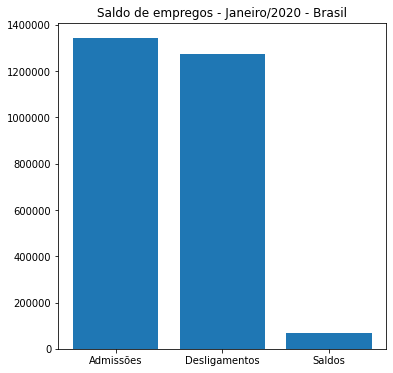

In [56]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(dadosFiltrados["Brasil"]["titulosBarras"], dadosFiltrados["Brasil"]["valoresBarras"])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # Desabilita a notação científica no eixo Y
plt.title("Saldo de empregos - Janeiro/2020 - Brasil")